*****
## <span><center>Author : OUEDRAOGO SALAM</center></span>
## <span><center>Date : 08/01/2023</center></span>
*****

## <span><center>INTRODUCTION</center></span>
Une compagnie d'automobile chinoise souhaite mettre en place une usine de fabrication de voiture locale. Cette nouvelle compagnie doit faire face à la concurrence entrangère notamment USA et Europe. 

Pour faire face à ces concurrent et prendre une grande part de marché, cette nouvelle compagnie fait recourt à des espère en analyse de données. En effet, la compagnie souhaite connaitre les facteurs qui influent sur les prix des véhicules américaines. Les éléments à mettre en evidence sont notamment : 
*  Quels sont les facteurs significatifs qui permettent de prédire les prix des cars ?  
>
*  A quel point ses facteurs sont assez descriptifs des prix des cars ?  

## <span><center>PREPARATION DES DONNEES</center></span>
Il s'agit dans cette partie de : 
* Collecter les données qui consiste à rassembler les données necessaires à l'analyse afin de répondre aux besions de la nouvelle compagnie chinoise.
* Evaluer les données : consistant à decouvrir les données, et ainsi enumérer les différentes problèmes rencontrées dans nos données. 
* Nettoyer les données : dans cette étape nous nettoyons les problèmes rencontrés lors de la phase d'évaluation

In [1]:
# Import des librairies et modules nessecaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
from statsmodels.graphics.correlation import plot_corr

In [2]:
# Configurations
rcParams["figure.figsize"] = (20, 6)
rcParams["figure.facecolor"] = "white"
base_color = sns.color_palette()[0]

In [3]:
# chargement du fichier des données
cars = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Les dimensions du dataset
cars.shape

(205, 26)

In [5]:
# Information sur les types de variables

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Les Cinq prémières lignes du dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
# Les colonnes de type numérique

cars.select_dtypes(include="number").head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Les colonnes de type object
cars.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [10]:
print(cars.fueltype.unique())
print(cars.aspiration.unique())
print(cars.doornumber.unique())
print(cars.carbody.unique())
print(cars.drivewheel.unique())
print(cars.enginelocation.unique())
print(cars.cylindernumber.unique())
print(cars.fuelsystem.unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [11]:
# Le nombre de lignes dupliquer
cars.duplicated().sum()

0

In [12]:
# Le nombre de valeurs manquantes
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Conclusion

Nous n'avons pu determiner aucun problèmes durant la phase d'analyse. Donc nous passons à l'étape d'analyse.

## <span><center>ANALYSE EXPLORATOIRE DES DONNEES</center></span>




###  <span><center>Analyse de la variable cible</center></span>


In [13]:
cars.price.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 1.])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

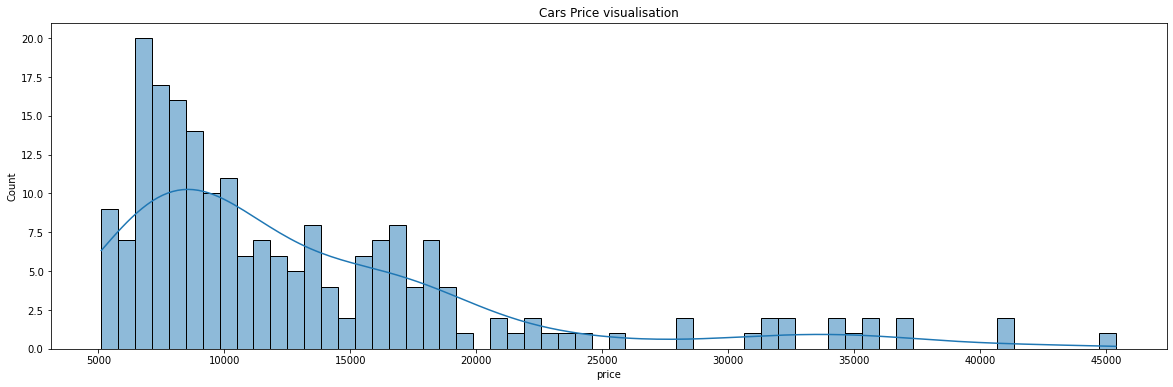

In [14]:
sns.histplot(data = cars, x="price", kde=True, bins=60)
plt.title("Cars Price visualisation");

#### Interprétation

* L'histogramme des prix des cars est asymétrie droite(allongé droite). Ce qui laisse appercevoir que la majorité des prix des cars sont inférieure à 15_000. Juste quelsque cars ont un prix supèrieur à 15_000.  

* Il y'a également une trés grande différence entre la valeur moyenne et la valeur mediane du prix des cars.

* Le prix minimale d'un cars est de 5118 et le prix maximale est de 45400.

* Les prix des cars sont éloignés de la moyenne donc ainsi nous avons une variance des prix est trés élévé. En effet 85% des cars ont un prix inférieur à 18500 pendant que 15% ont un prix compris entre 18500 et 45000.

###  <span><center>Analyse des variables Qualitatives </center></span>

In [15]:
cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

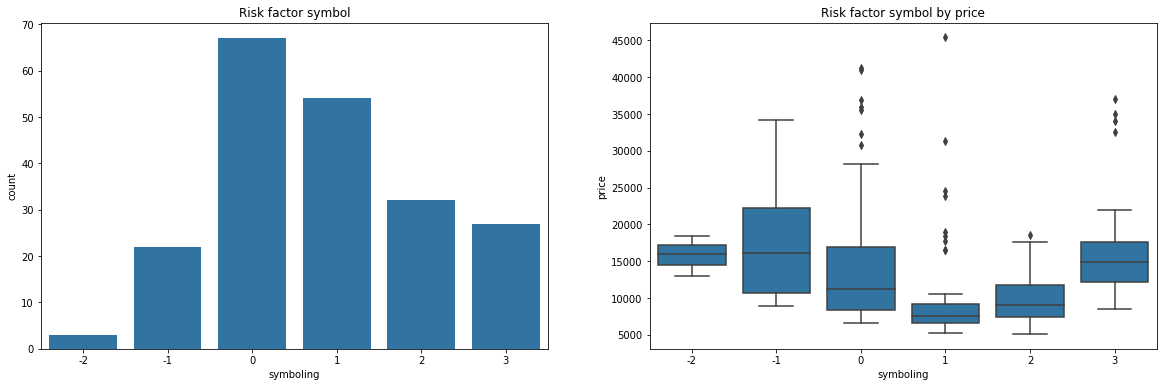

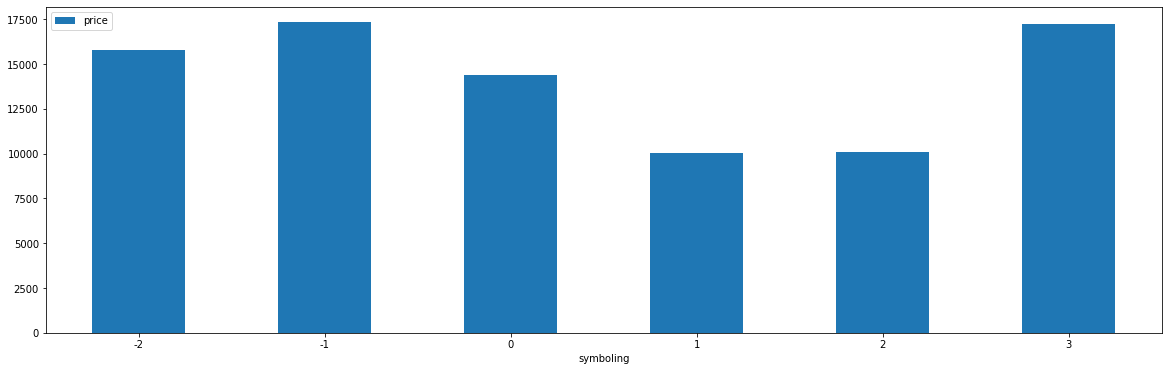

In [16]:
# plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = cars, x="symboling", color=base_color)
plt.title("Risk factor symbol")
plt.subplot(1, 2, 2)
plt.title("Risk factor symbol by price")
sns.boxplot(data = cars, x="symboling", y="price", color=base_color);
plt.show()
symboling_price_means = pd.DataFrame(cars.groupby("symboling")["price"].agg(np.mean))
symboling_price_means.plot.bar()
plt.xticks(rotation=360);

### Interprétation

* Il y'a beaucoup plus de car qui ont un symboling à 0 et à 1.

* Les cars dont le symboling est à -1 sont beaucoup plus chères. Ensuite viens les cars qui ont symboling à 0.  
* Les cars dont les symboling sont à 1 et 2 sont bien moins chères. 

In [17]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
cars.columns= cars.columns.str.replace("CarName", "car_name")

In [19]:
# Obtention du nom de l'usine appartir du nom des véhicules
car_company = cars.car_name.apply(lambda x : x.split()[0])
cars.insert(3, column="car_company", value=car_company)

In [20]:
cars.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

* maxda == mazda
* Nissan == nissan
* porsche == porcshce
* toyota == toyouta
* vokswagen == volkswagen == vw

In [21]:
def rename_cars_name(old_name="", new_name=""):
    cars["car_company"].replace(to_replace=old_name, value=new_name, inplace=True)

In [22]:
cars["car_company"] = cars.car_company.str.lower()
rename_cars_name("maxda", "mazda")
rename_cars_name("toyouta", "toyota")
rename_cars_name("vokswagen", "volkswagen")
rename_cars_name("vw", "volkswagen")
rename_cars_name("porcshce", "porsche")

In [23]:
cars.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [24]:
car_company_counts = cars.car_company.value_counts()
car_company_orders = car_company_counts.index.to_list()

In [25]:
# cars[["car_company", "price"]]
car_company_group = cars.groupby("car_company")
car_company_group["price"].agg([np.max, np.min])

,amax,amin
car_company,,
alfa-romero,16500.0,13495.0
audi,23875.0,13950.0
bmw,41315.0,16430.0
buick,45400.0,25552.0
chevrolet,6575.0,5151.0
dodge,12964.0,5572.0
honda,12945.0,5399.0
isuzu,11048.0,6785.0
jaguar,36000.0,32250.0


In [26]:
def visualisation_barreh(x, orders=None, title=""):
    plt.subplot(1, 2, 1)
    sns.countplot(data = cars , y=x, color=base_color, order=orders)
    plt.title(title + " visualisation")
    plt.subplot(1, 2, 2)
    plt.title(title + " vs price visualisation")
    sns.boxplot(data = cars , y=x, x="price", order=orders, color=base_color);
    mean_plot(x, title)

def visualisation_barre(x, orders=None, title=""):
    plt.subplot(1, 2, 1)
    sns.countplot(data = cars , x=x, color=base_color, order=orders)
    plt.title(title + " visualisation")
    plt.subplot(1, 2, 2)
    plt.title(title + " vs price visualisation")
    sns.boxplot(data = cars , x=x, y="price", order=orders, color=base_color)
    mean_plot(x, title)
    
def visualisation_pie(x, title=""):
    x_counts = cars[x].value_counts()
    plt.subplot(1, 2, 1)
    plt.pie(x_counts, labels=x_counts.index, autopct="%.2f%%")
    plt.title(title)
    plt.subplot(1, 2, 2)
    sns.boxplot(data = cars , x=x, y="price")
    plt.title(title + " vs price")
    mean_plot(x, title)
    
def mean_plot(x=None, title=""):
    plt.show()
    price_means = pd.DataFrame(cars.groupby(x)["price"].agg(np.mean).sort_values(ascending=False))
    price_means.plot.bar(sort_columns=True)
    plt.xticks(rotation=360)
    plt.title(title + "  vs Prix moyen")

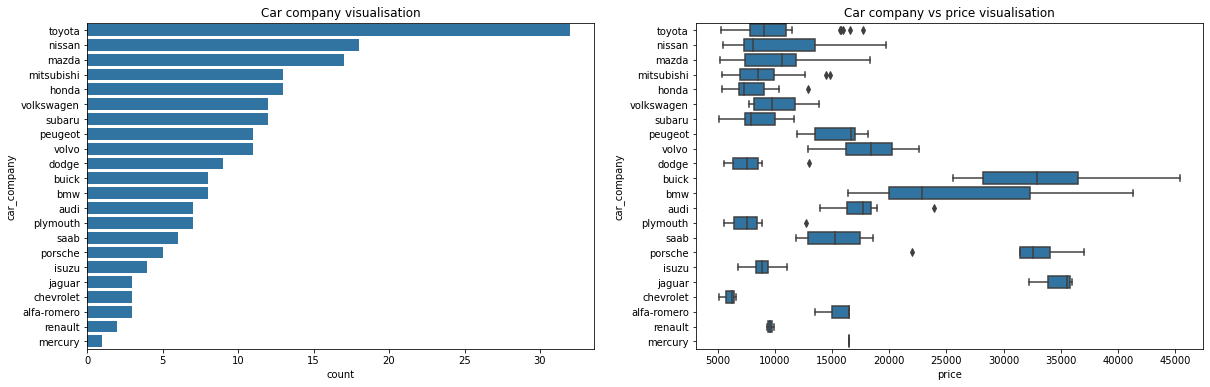

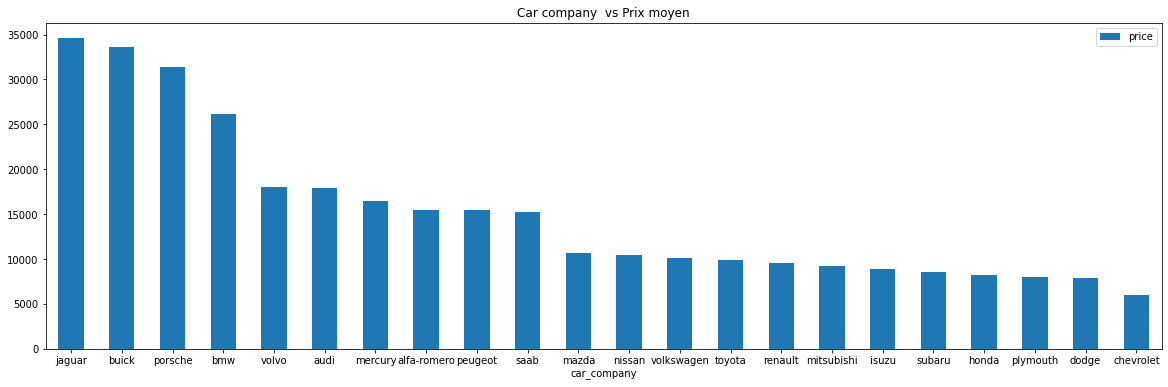

In [27]:
visualisation_barreh("car_company", car_company_orders, "Car company")

### Interprétation

* Il y'a beaucoup plus de cars de marque Toyota. Les cars de marque Nissa viennent en deuxième position. Cependant il y'a moins de cars de marque renault et mercury.

* Les cars de marque BUICK et BMW coûte les plus chers. Ensuite vient les marques porcshe. Cependant, les cars les moins chers sont notamment les marques chevrolet, mazda et subaru, renault

* Les cars de la compagny jaguar, buick, porsche et bmw coût en moyenne trés chère.

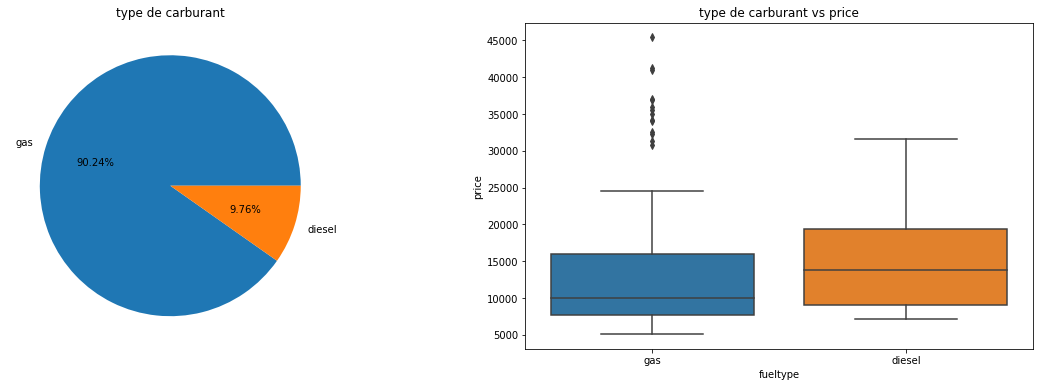

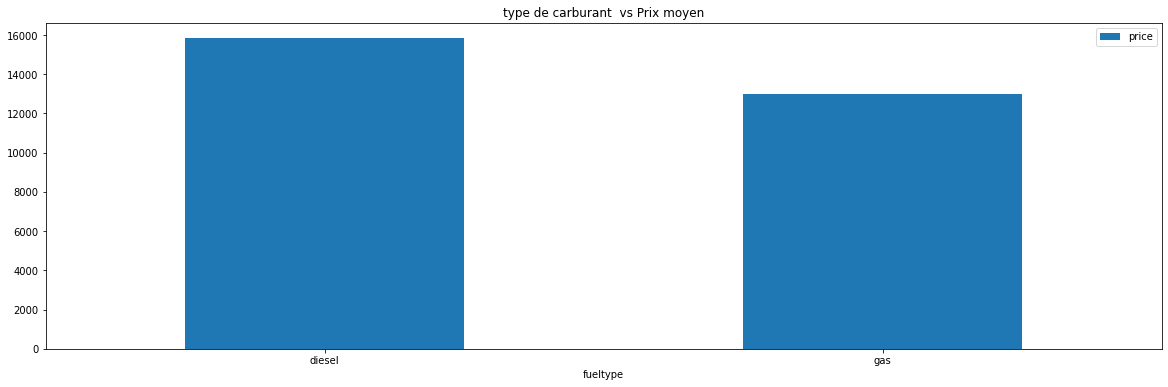

In [28]:
visualisation_pie("fueltype", "type de carburant")

### Interprétation

* La majorité des cars de notre dataset fonctionne avec le carburant gas(gasoil) soit 90.24% des données et 9.76% utilise des moteurs diesel.

* Les cars utilisant le diesel coût plus chers que ceux qui utilise le gas. 

* Les cars à moteurs diesel sont en moyenne chère que les moteurs gas.

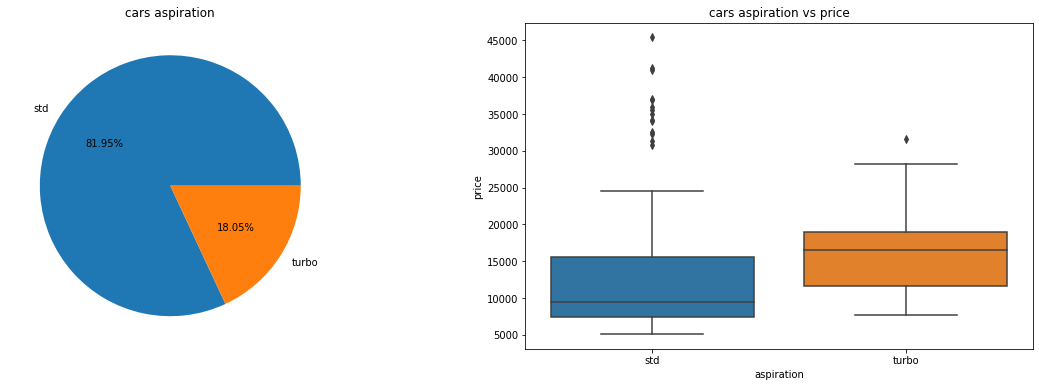

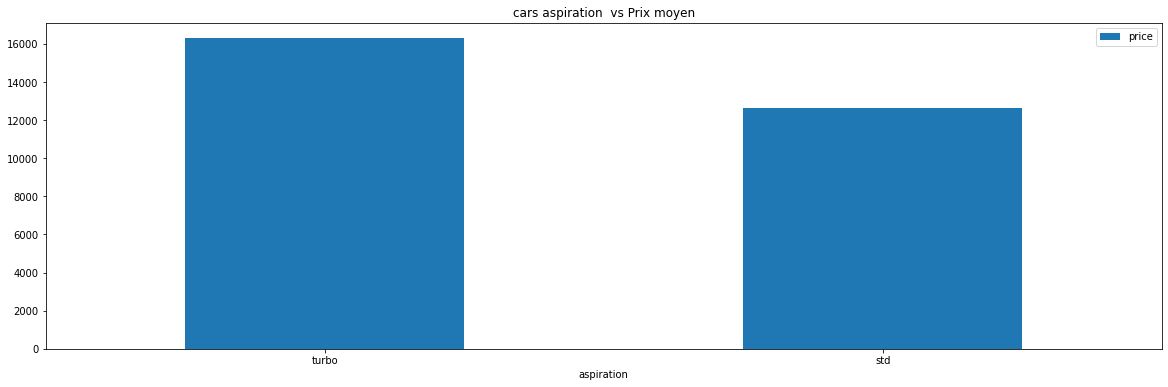

In [29]:
visualisation_pie("aspiration", "cars aspiration")

### Interprétation

* 81.92% des cars ont une aspiration standards et juste 18.05% ont le turbo.

* Les cars avec les turbos coût plus cherès que les cars avec une aspiration standard.

* Les cars munient de turbo sont plus chères en moyenne que les cars à aspiration standart.

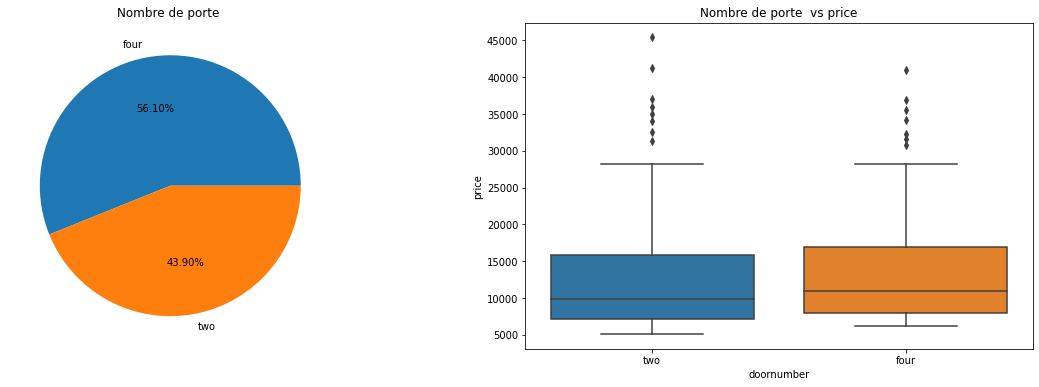

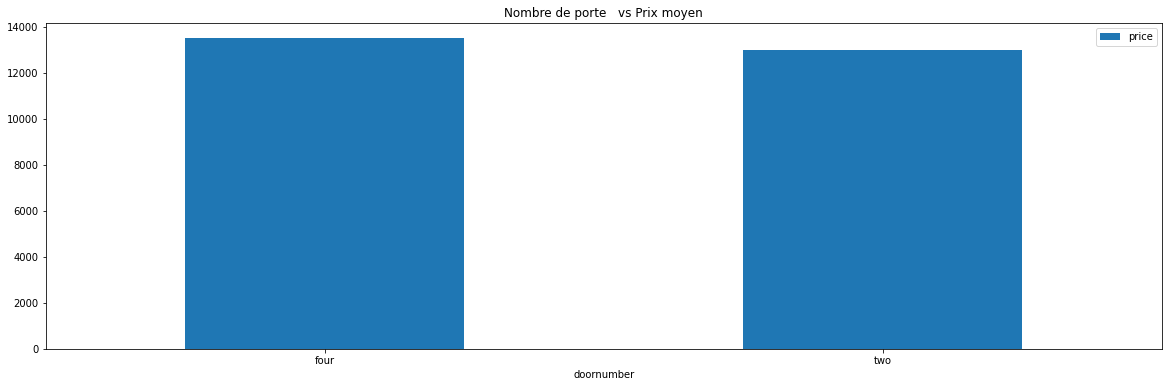

In [30]:
visualisation_pie("doornumber", "Nombre de porte ")

### Interprétation

* 56.10% des cars sont à 4 porte contre 43.90% qui ont juste deux porte.

* Le nombre de porte à très peux d'influence sur le prix des cars.

* Les cars à 4 portes et à 2 portes ont en moyenne le même prix.

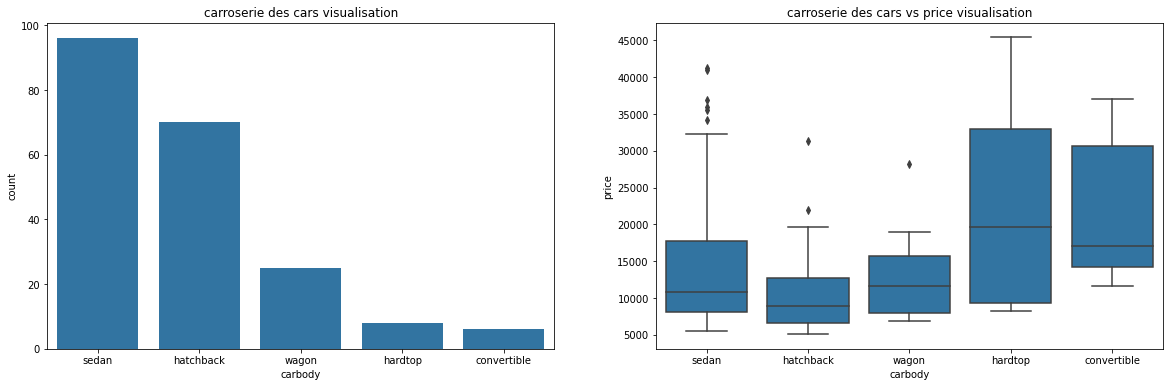

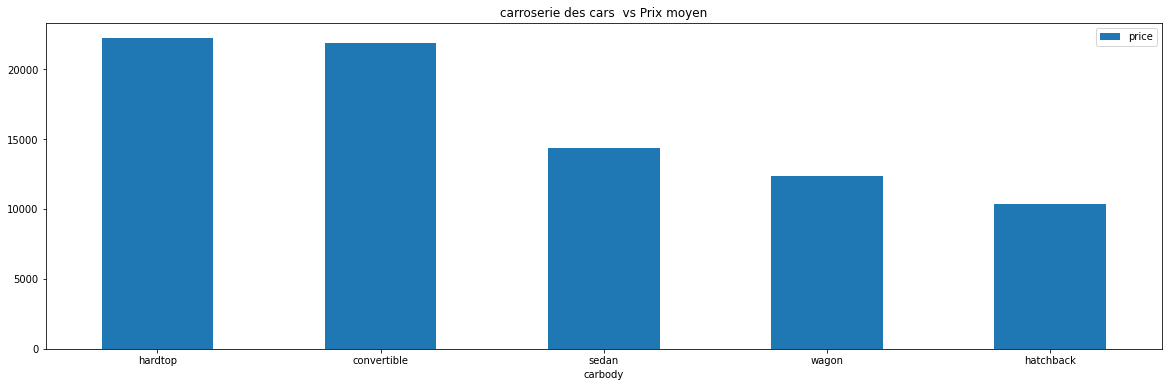

In [31]:
carbody_orders = cars.carbody.value_counts().index.to_list()
visualisation_barre("carbody", carbody_orders, "carroserie des cars")

### Interprétation

* Les cars dont la carroserie est de type sedan sont les plus preferer. Ensuite, nous avons les cars de carroserie hatchback. Les carroserie hardtop et convertibles sont de moins en moins demandés.

* Les carroserie hardtop et convertible coût plus cherès que les autres. C'est ce qui fait qu'ils de moins en moins représentatifs. 

* Les cars équipés de carroserie hardtop et convertible ont en moyenne quasiment la même valeurs et sont les plus chères en moyenne.

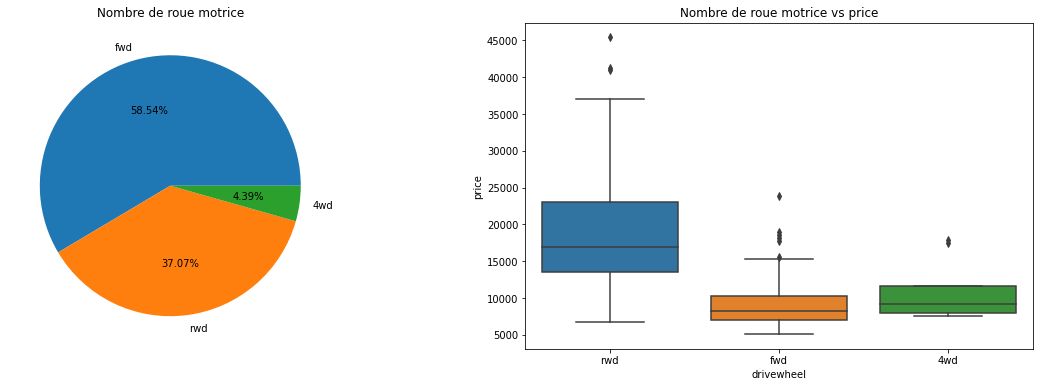

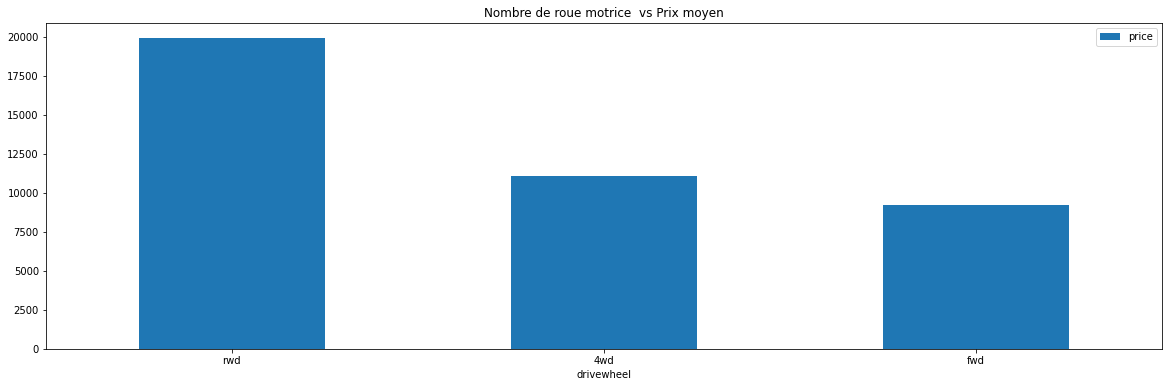

In [32]:
visualisation_pie("drivewheel", "Nombre de roue motrice")

### Interprétation

* Notre dataset est constitué en majorité de cars de type fwd(attraction avant) soit 58.54%. juste 37.07% sont des cars de type rwd(attraction arrière) et seulement 4.39% sont des 4wd.

* Les cars rwd coût plus chères. Les cars les moins chères sont de types fwd.

* En moyenne les cars à traction arrière sont chères.

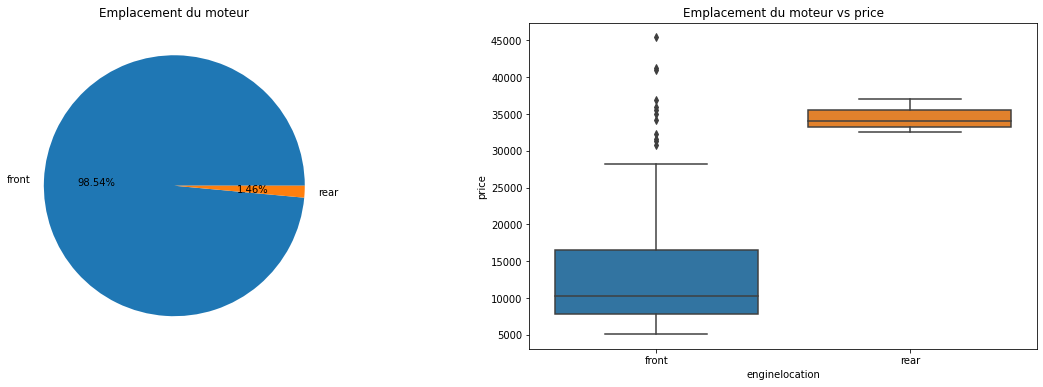

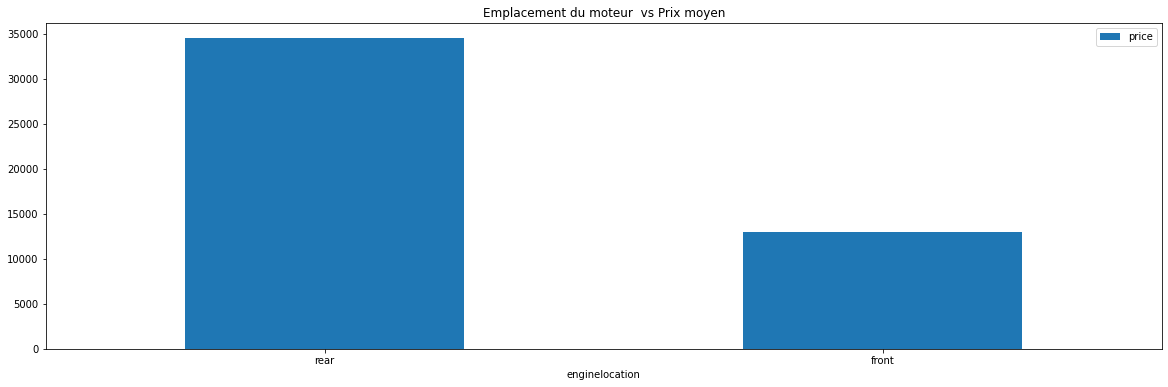

In [33]:
visualisation_pie("enginelocation", "Emplacement du moteur")

### Interpretation
* 98.54% des cars ont leurs moteurs placés en avant. contre 1.46% dont les moteurs sont placés en arrière.

* Les cars dont les moteurs sont placés en avant coût bien moins chères que ceux dont les moteurs sont en arrière.  

* Les cars dont les moteuts sont placés en arrière sont en moyenne chères.

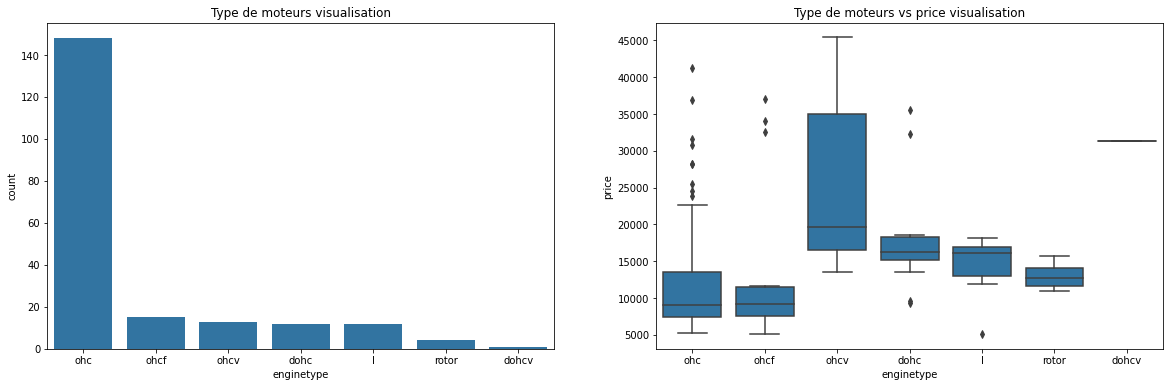

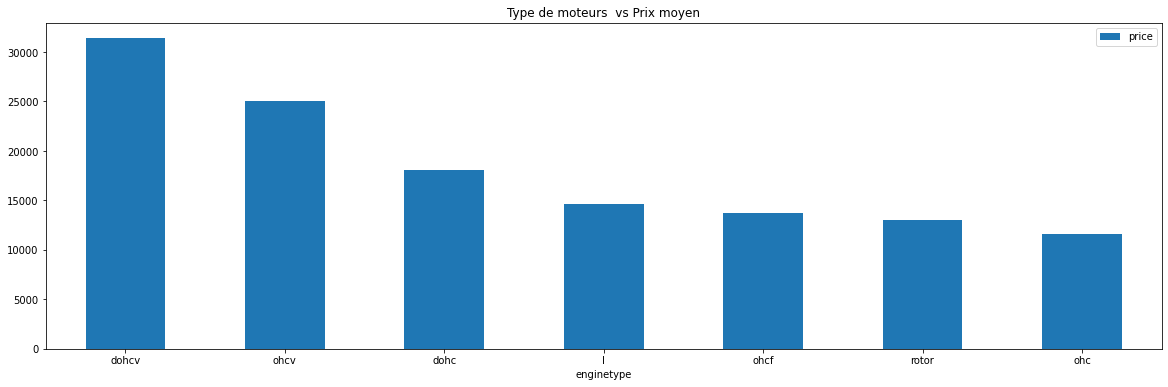

In [34]:
enginetype_orders = cars.enginetype.value_counts().index.to_list()
visualisation_barre("enginetype", enginetype_orders, "Type de moteurs")

### Interprétation

* Les moteurs de types ohc sont les plus préfèré.

* Les moteurs ohcv coût trés chères que les autres type de moteurs.

* Cependant, les moteurs dohcv et ohcv ont en moyenne le prix le plus haut.

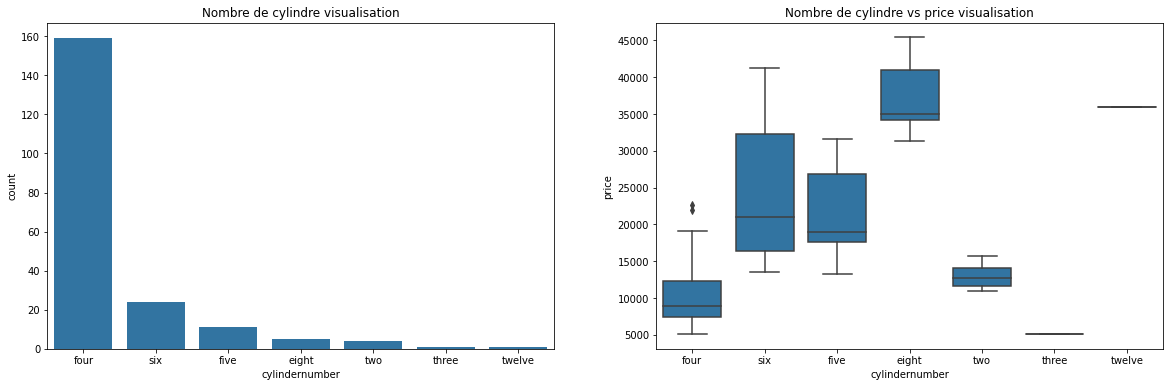

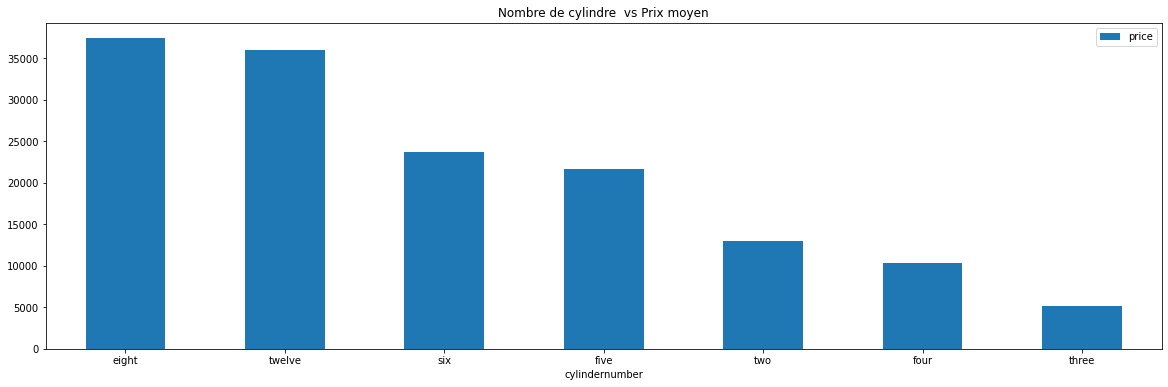

In [35]:
cylindernumber_orders = cars.cylindernumber.value_counts().index.to_list()
visualisation_barre("cylindernumber", cylindernumber_orders, "Nombre de cylindre")

* La plus part des cars ont four, six et five cylindre.

* cependant les cars qui ont eight(8) et twelve(12) cylindres coût trés chères

* Les cars dotés de eight(8) et de twelve(12) cylindre sont en moyenne trés chère.

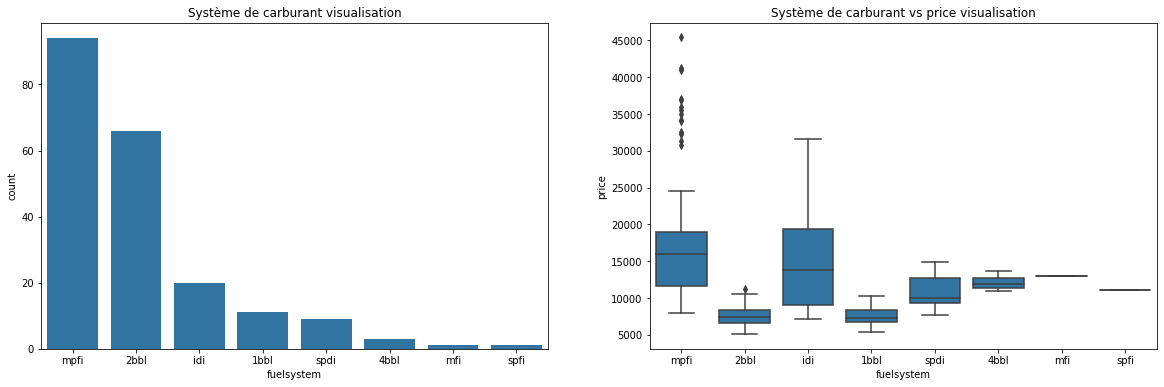

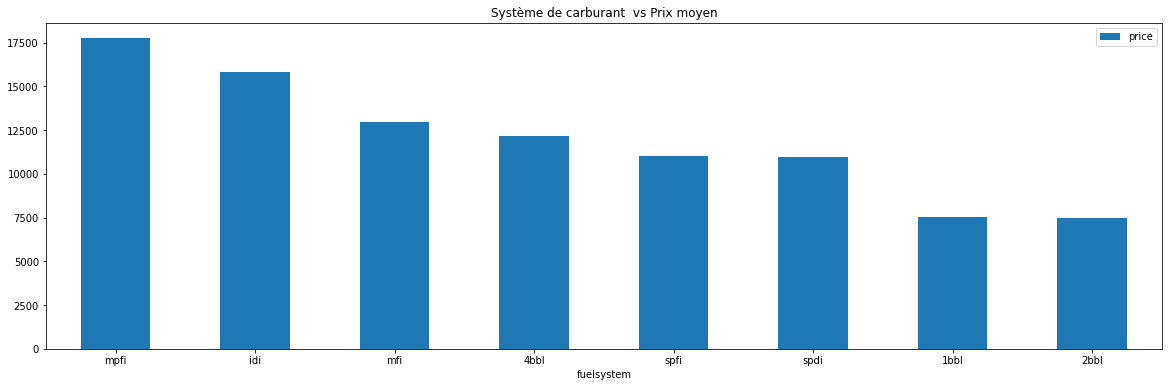

In [36]:
fuelsystem_orders = cars.fuelsystem.value_counts().index.to_list()
visualisation_barre("fuelsystem", fuelsystem_orders, "Système de carburant")

### Interprétation

* La majorité des cars sont équipés d'un système de carburation mpfi ou de 2bbl.

* Cependant, les car ayant le fuelsystem mpfi et idi sont plus chères.

* En moyenne la pmfi et la idi sont chères.

###  <span><center>Analyse des variables Quantitatives </center></span>

In [37]:
# Selection des variables numerice
cars_num = cars.select_dtypes("number")

# suppression des colonnes inutile
cars_num.drop(columns=["car_ID", "symboling"], inplace = True)
cars_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
corr_matrix = cars_num.corr()
corr_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


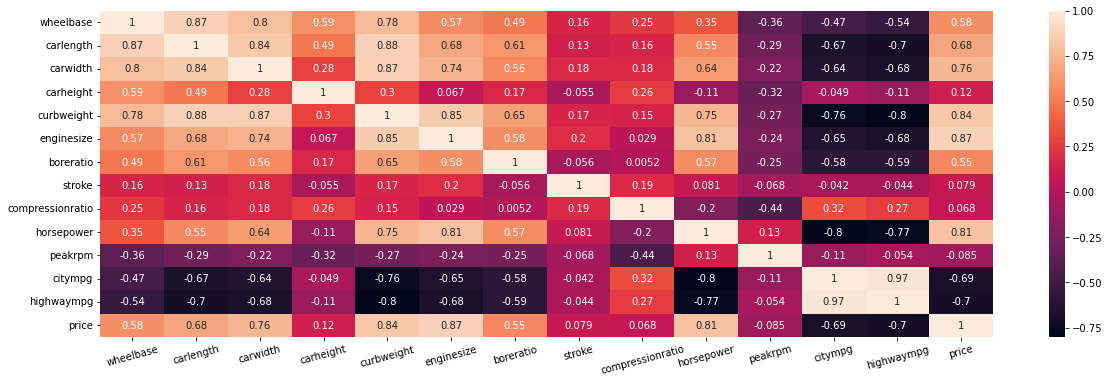

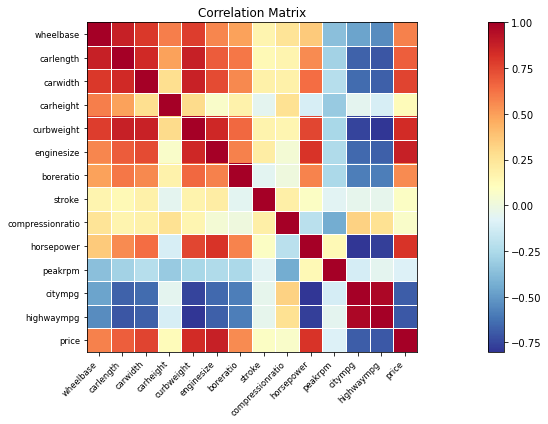

In [39]:
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=15)
plot_corr(corr_matrix, xnames=corr_matrix.index, ynames=corr_matrix.index);

In [40]:
def num_pairplot(x, y, z):
    g = sns.PairGrid(data=cars_num, x_vars=[x, y, z], y_vars="price", aspect=1, height=5)
    g.map(sns.scatterplot)
def scatterplot(x):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=cars_num, x=x, y="price");

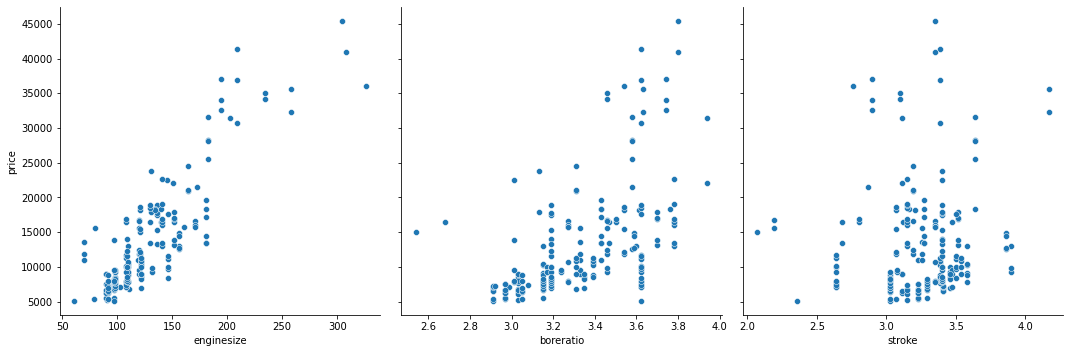

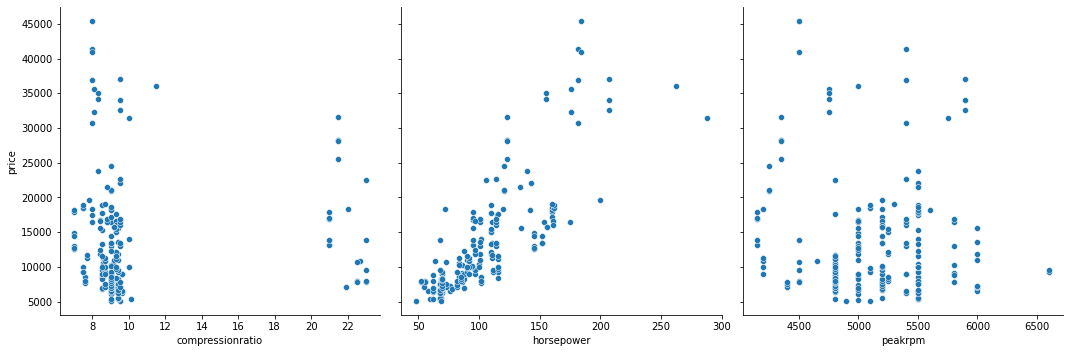

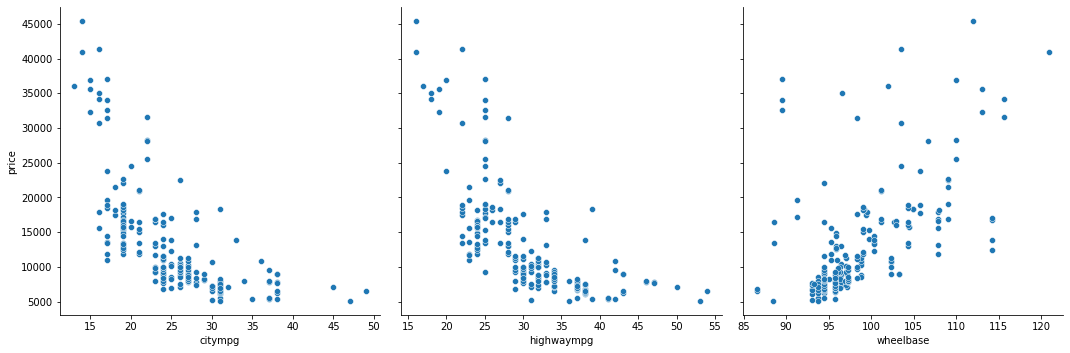

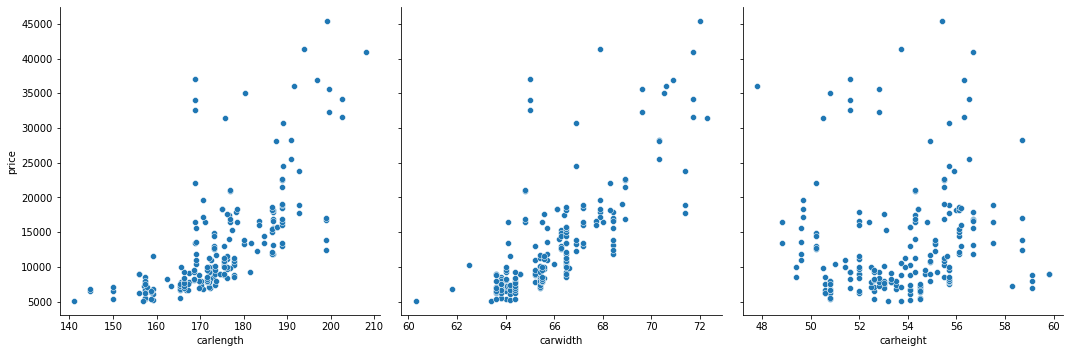

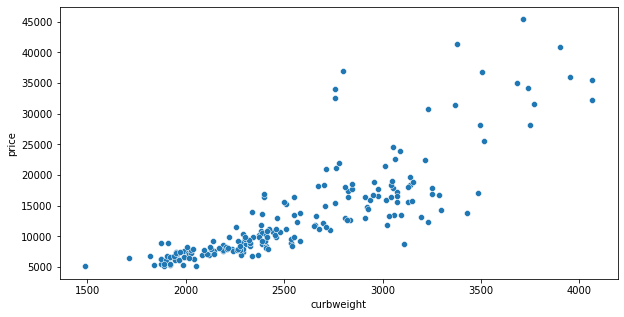

In [41]:
num_pairplot('enginesize', 'boreratio', 'stroke')
num_pairplot('compressionratio', 'horsepower','peakrpm')
num_pairplot('citympg', 'highwaympg','wheelbase')
num_pairplot('carlength', 'carwidth', 'carheight')
scatterplot("curbweight")

# Interprétation

* Il y'a une corrélation négative et significatif entre les variables 'citympg', 'highwaympg',  et le prix des cars.

* Il y'a une corrélation positive et significatif entre les variables 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'carlength', 'carwidth', 'curbweight' et le prix des cars. 

* Il y'a une faible corrélation et non significatif entre les variables 'stroke', 'compressionratio', 'peakrpm', 'carheight' et le prix des cars.

In [42]:
cars_num.head().columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [43]:
len(cars_num.head().columns)

14

In [44]:
# https://www.scottsfortcollinsauto.com/the-gas-mileage-difference-between-city-and-highway-driving/

fuel_economy = cars["citympg"] * 0.55 + cars["highwaympg"] * 0.55

cars.insert(25, "fuel_economy", fuel_economy)
cars_num.insert(12, "fuel_economy", fuel_economy)
# cars_num["fuel_economy"] = cars["citympg"] * 0.55 + cars["highwaympg"] * 0.55

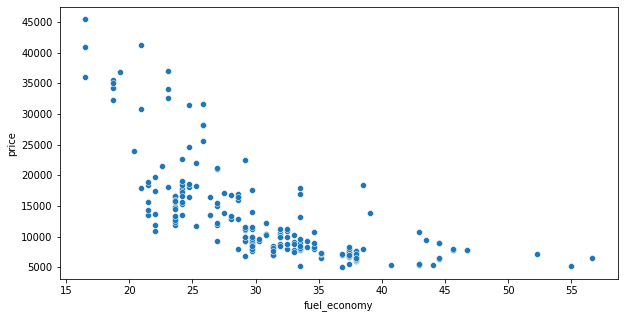

In [45]:
scatterplot("fuel_economy")

### Interprétation

* Il y'a une corrélation négative et significative entre le prix et l'economie de carburant

In [46]:
cars.head().columns

Index(['car_ID', 'symboling', 'car_name', 'car_company', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'fuel_economy', 'highwaympg', 'price'],
      dtype='object')

In [47]:
cars_price_means = cars.groupby("car_company")["price"].agg(np.mean)


cars_merged = cars.merge(cars_price_means.reset_index(), how="left", on="car_company")
bins = [0.0, 10_000.0, 20_000.0, 40_000.0]
bins_names = ['low', 'medium', 'high']

cars_range = pd.cut(cars_merged["price_y"], bins, labels=bins_names, right=False)

cars.insert(4, "cars_range", cars_range)

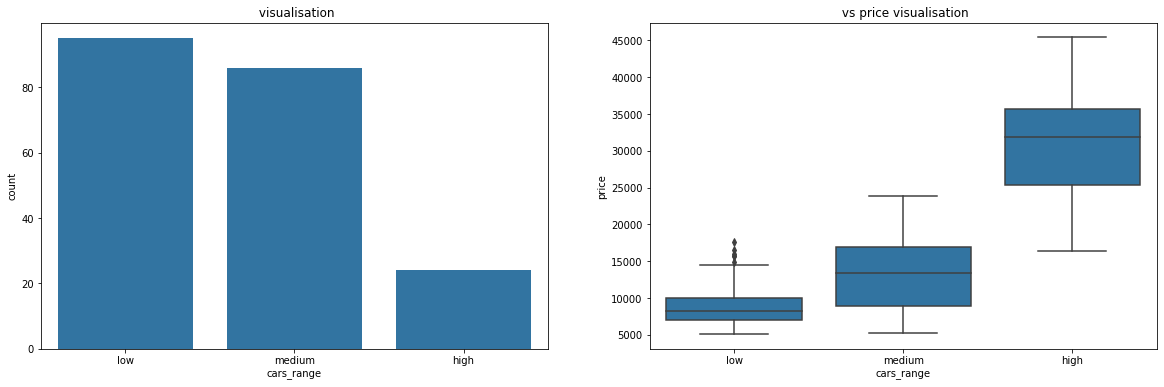

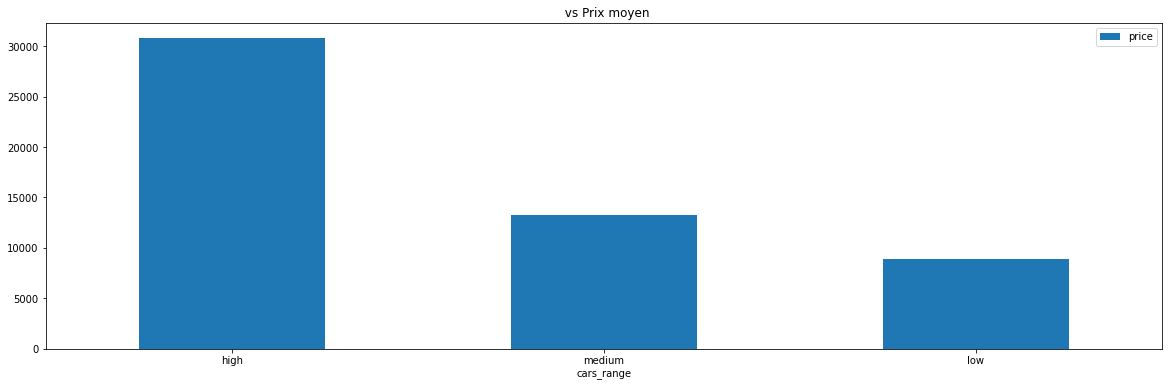

In [48]:
visualisation_barre("cars_range")


###  <span><center> MODEL DE PREDICTION </center></span>

In [49]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression, SelectFromModel
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
new_columns = [
            'fueltype', 'aspiration','carbody', 'cars_range', 'enginetype', 'cylindernumber', \
            'drivewheel', 'curbweight', 'wheelbase', 'enginesize', 'boreratio','horsepower',\
            'fuel_economy', 'carlength','carwidth', 'price'
        ]

model_df = cars[new_columns]

In [51]:
model_df.head()

,fueltype,aspiration,carbody,cars_range,enginetype,cylindernumber,drivewheel,curbweight,wheelbase,enginesize,boreratio,horsepower,fuel_economy,carlength,carwidth,price
0,gas,std,convertible,medium,dohc,four,rwd,2548,88.6,130,3.47,111,26.40,168.8,64.1,13495.0
1,gas,std,convertible,medium,dohc,four,rwd,2548,88.6,130,3.47,111,26.40,168.8,64.1,16500.0
2,gas,std,hatchback,medium,ohcv,six,rwd,2823,94.5,152,2.68,154,24.75,171.2,65.5,16500.0
3,gas,std,sedan,medium,ohc,four,fwd,2337,99.8,109,3.19,102,29.70,176.6,66.2,13950.0
4,gas,std,sedan,medium,ohc,five,4wd,2824,99.4,136,3.19,115,22.00,176.6,66.4,17450.0


In [52]:
num_columns = model_df.select_dtypes(include="number").columns.to_list()
robustScaler = RobustScaler()
scaled_df = pd.DataFrame(robustScaler.fit_transform(model_df[num_columns]), columns=num_columns)

In [53]:
object_columns = model_df.select_dtypes(include="object").columns.to_list()
oneHotEncoder = OneHotEncoder(sparse=False)
encoded_df = pd.DataFrame(oneHotEncoder.fit_transform(model_df[object_columns]), columns=oneHotEncoder.get_feature_names_out())
encoded_df = encoded_df.astype("int")

In [54]:
pp_df = pd.concat([scaled_df, encoded_df], axis=1)
price = pp_df.pop("price")
pp_df.insert(34, "price", price)

In [55]:
lr = LinearRegression()
lr.fit(pp_df.iloc[:, :-1], pp_df.price)
selectFromModel = SelectFromModel(lr)
selectFromModel.fit(pp_df.iloc[:, :-1], pp_df.price)

SelectFromModel(estimator=LinearRegression())

In [56]:
len(selectFromModel.get_feature_names_out())

11

In [57]:
price = pd.DataFrame(pp_df.price)
pp_df = pp_df[selectFromModel.get_feature_names_out()]
pp_df = pd.concat([pp_df,  price], axis=1)

In [58]:
pp_df.head()

,curbweight,horsepower,carbody_convertible,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,price
0,0.169620,0.347826,1,0,0,0,0,0,0,0,1,0.367183
1,0.169620,0.347826,1,0,0,0,0,0,0,0,1,0.711991
2,0.517722,1.282609,0,0,0,0,0,1,0,0,0,0.711991
3,-0.097468,0.152174,0,0,0,1,0,0,0,0,1,0.419392
4,0.518987,0.434783,0,0,0,1,0,0,0,1,0,0.820998


In [59]:
X_train, X_test, y_train, y_test = train_test_split(pp_df.iloc[:, :-1], pp_df.price, test_size=0.2, random_state=0)

In [60]:
print(X_train.shape)
print(y_train.shape)
print("**"*20)
print(X_test.shape)
print(y_test.shape)

(164, 11)
(164,)
****************************************
(41, 11)
(41,)


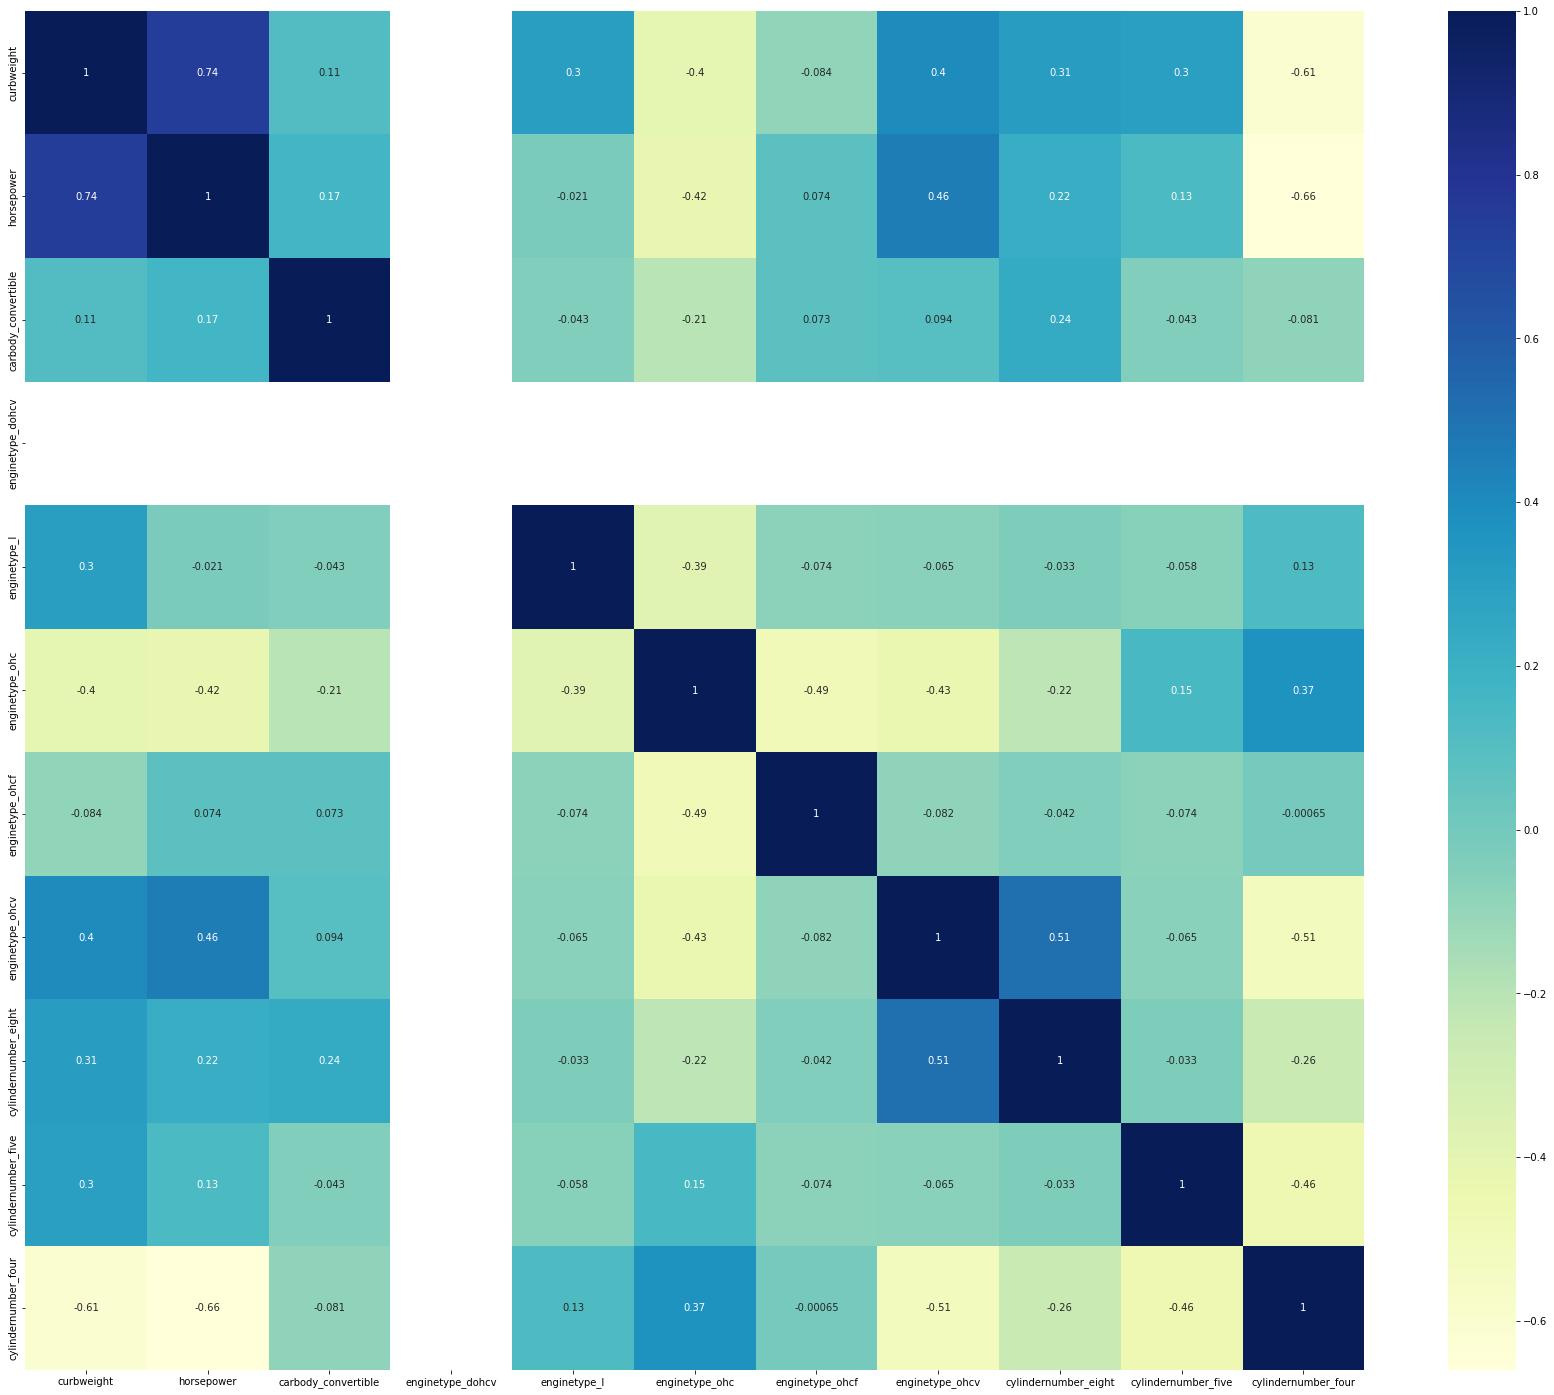

In [61]:
#Correlation using heatmap
corr_matrix = X_train.corr()
plt.figure(figsize = (30, 25))
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.show()

In [62]:
X_train_new = X_train.copy()

In [63]:
def build_model(X, y):
    X = sm.add_constant(X)
    linearModel = sm.OLS(y, X).fit()
    print(linearModel.summary())
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return (vif)

In [64]:
# variance_inflation_factor([X_train_new.values, i for i in range(X_train_new.shape[1])]
                          


In [65]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.39e-70
Time:                        10:21:13   Log-Likelihood:                -26.128
No. Observations:                 164   AIC:                             74.26
Df Residuals:                     153   BIC:                             108.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4819 

In [66]:
checkVIF(X_train_new)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
0,const,22.87
6,enginetype_ohc,4.28
1,curbweight,3.94
11,cylindernumber_four,3.66
2,horsepower,3.53
5,enginetype_l,2.45
8,enginetype_ohcv,2.39
7,enginetype_ohcf,2.23
10,cylindernumber_five,1.97
9,cylindernumber_eight,1.54


In [67]:
X_train_new.drop(columns=["enginetype_dohcv"], inplace=True)

In [68]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.39e-70
Time:                        10:21:14   Log-Likelihood:                -26.128
No. Observations:                 164   AIC:                             74.26
Df Residuals:                     153   BIC:                             108.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4819 

In [69]:
checkVIF(X_train_new)

,features,VIF
0,const,22.87
5,enginetype_ohc,4.28
1,curbweight,3.94
10,cylindernumber_four,3.66
2,horsepower,3.53
4,enginetype_l,2.45
7,enginetype_ohcv,2.39
6,enginetype_ohcf,2.23
9,cylindernumber_five,1.97
8,cylindernumber_eight,1.54



###  <span><center> RESIDUAL ANALYSIS OF MODEL </center></span>

In [70]:
from sklearn.metrics import r2_score

In [71]:
linear_model = sm.OLS(y_train, X_train_new).fit()
y_train_price = linear_model.predict(X_train_new)

Text(0.5, 0, 'Errors')

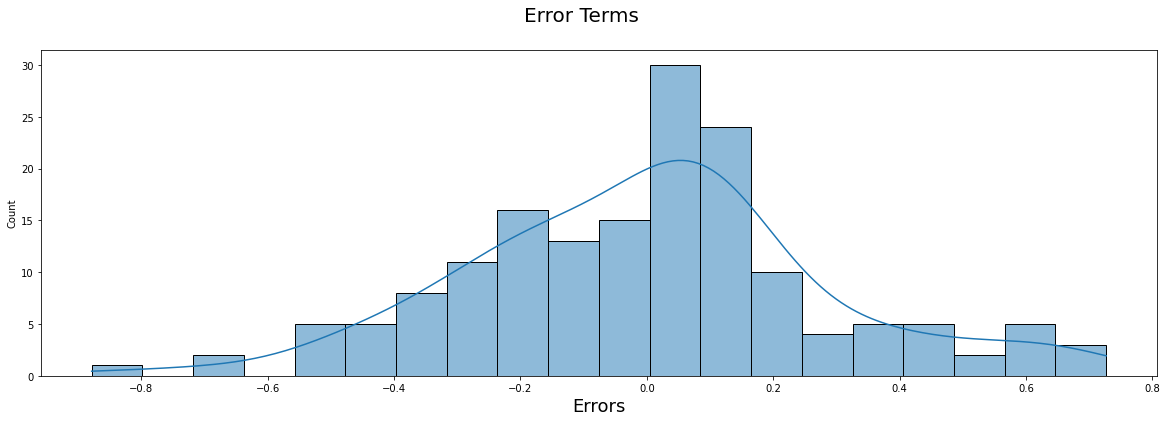

In [72]:
fig = plt.figure()
sns.histplot((y_train - y_train_price),kde=True, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   


###  <span><center> Prédiction et évaluation </center></span>

In [73]:
trained_columns = X_train_new.columns
trained_columns = trained_columns.drop("const")

In [74]:
trained_columns

Index(['curbweight', 'horsepower', 'carbody_convertible', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four'],
      dtype='object')

In [75]:
X_test_new = X_test[trained_columns]
X_test_new = sm.add_constant(X_test_new)

In [76]:
y_predict = linear_model.predict(X_test_new)

In [77]:
r2_score(y_test, y_predict)

0.7670586815372902

Text(0, 0.5, 'y_pred')

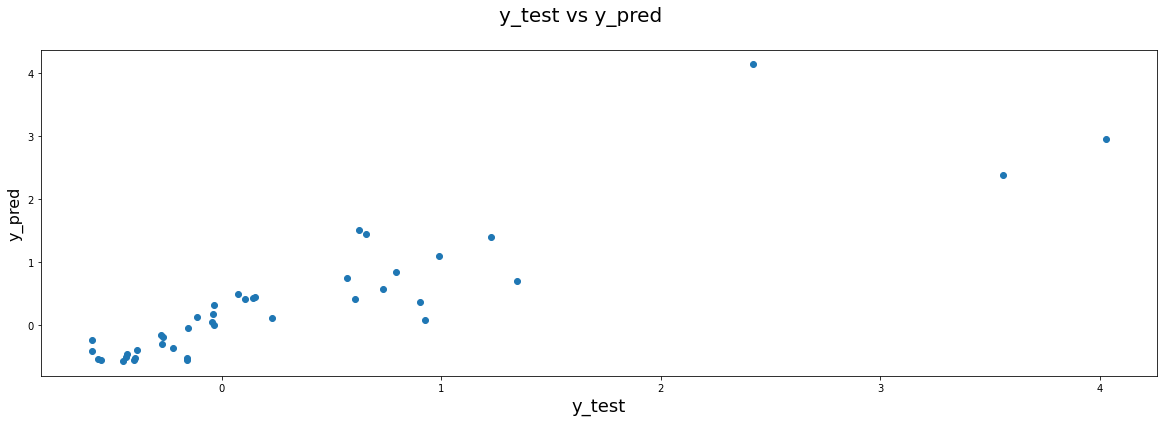

In [78]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [79]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.39e-70
Time:                        10:21:16   Log-Likelihood:                -26.128
No. Observations:                 164   AIC:                             74.26
Df Residuals:                     153   BIC:                             108.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4819 


##  <span><center> CONCLUSION </center></span>
* R-squared est 89.80% et Adj. R-squared est 89.10%. Ce qui signifie que notre model est susceptible d'expliqué environ 90% de la variation du prix des cars;

* F-Statistic est 134.9 et p-value est 1.39e-70 qui est inférieur au seuil de 5%, alors notre model est statistiquement significatif. On peut dire que notre model explique 90% de la variation du prix n'est pas le fruit du hasard.

* Les diffèrentes p-values des variables independantes sont tous inférieur au seuil de 5%. Alors C'est variable sont parfait pour expliquer la variation des prix